In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.io.parsers.read_csv('SI_number_of_sequences_correlation',delim_whitespace=True)

In [3]:
allgenes = list(set(df['gene']))

In [4]:
allvals = [250,500,750,1000,1250,1500]

In [5]:
def pboc_style_mpl():
    """
    Formats matplotlib plotting enviroment to that used in
    Physical Biology of the Cell, 2nd edition.
    """
    rc = {'lines.linewidth': 1.25,
          'axes.labelsize': 8,
          'axes.titlesize': 9,
          'axes.facecolor': '#E3DCD0',
          'xtick.labelsize': 7,
          'ytick.labelsize': 7,
          'font.family': 'Lucida Sans Unicode',
          'grid.linestyle': '-',
          'grid.linewidth': 0.5,
          'grid.color': '#ffffff',
          'legend.fontsize': 8,
          'figure.dpi': 300,
          'savefig.dpi': 300}
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=-1)
    plt.rc('ytick.major', pad=-1)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[3.5, 2.5])
    plt.rc('svg', fonttype='none')
    plt.rc('legend', title_fontsize='8', frameon=True,
           facecolor='#E3DCD0', framealpha=1)
    sns.set_style('darkgrid', rc=rc)
    sns.set_palette("colorblind", color_codes=True)
    sns.set_context('notebook', rc=rc)
pboc_style_mpl()

In [6]:
def check_correct(s,gene='test',count=0):
    if s['gene'] == gene and s['count'] == count:
        return True
    else:
        return False

In [9]:
allgenes = ['hslU','araC','leuABCD','maoP','tig','aphA','rspA']

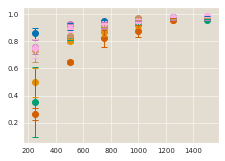

In [12]:
for gene in allgenes:
    v_mean = []
    v_std = []
    for count in allvals:
        
        goodrow = df.apply(check_correct,args=(gene,count),axis=1)
        right_row = df[goodrow]
        v_mean.append(np.mean(np.array(right_row[['rep0','rep1','rep2']])))
        v_std.append(np.std((np.array(right_row[['rep0','rep1','rep2']]))))
    plt.scatter(allvals,v_mean)
    plt.errorbar(allvals,v_mean,yerr=v_std,elinewidth=1,capsize=3,capthick=1,linewidth=0)
plt.savefig('downsample_err.eps',format='eps')

In [30]:
v_std

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]